In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

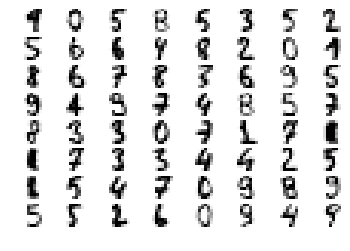

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    x_outputs1 = []
    for i in range(len(x_outputs)):
        if (x_outputs[i][0] == 1):
            x_outputs1.append(tuple([0,1]))
        else:# [i][0] == 0
            x_outputs1.append(tuple([1,0]))
    x_outputs = x_outputs1 
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            real_outputs = np.array(x_outputs).reshape(samplesize,2)
            #print(real_outputs)
            ce = -np.mean(np.sum(np.array(real_outputs) * np.log(px_outputs), axis = 1))
    

            genome.fitness = 1-ce

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 40)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
#class1 = [0, 2, 4, 6, 8]
#winner1 = get_winner(class1)

In [7]:
winner_list = []
classes = [[0,2,4,6,8],[0,4,5,8,9],[1,3,4,6,9],[1,2,3,6,7,8,9],[1,4,5,6,7],[1,3,5,7,8],[0,3,4,7,8],[1,2,3,4,5],[0,2,5,7,9],[1,2,5,6,8],[1,2,4,7,9],[0,6,7],[0,2,3],[1,8,9],[0,2,3,4,5,6,7,8,9]]

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:803
number of class2:814

 ****** Running generation 0 ****** 

Population's average fitness: 0.09662 stdev: 0.15115
Best fitness: 0.36158 - size: (2, 13) - species 6 - id 34
Average adjusted fitness: 0.510
Mean genetic distance 2.865, standard deviation 0.473
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 6.998 sec

 ****** Running generation 1 ****** 

Population's average fitness: -0.85572 stdev: 3.76053
Best fitness: 0.38311 - size: (3, 15) - species 1 - id 375
Average adjusted fitness: 0.958
Mean genetic distance 2.912, standard deviation 0.484
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 5.525 sec (6.262 average)

 ****** Running generation 2 ****** 

Population's average fitness: -0.83738 stdev: 3.22131
Best fitness: 0.39110 - size: (4, 17) - species 2 - id 535
Average adjusted fitness: 0.923
Mean genetic distance 2.987, standard deviation 0.481
Population of 202 members in 27 species
Total extincti

Population's average fitness: -0.52497 stdev: 3.20581
Best fitness: 0.51294 - size: (6, 21) - species 23 - id 3041
Average adjusted fitness: 0.961
Mean genetic distance 3.181, standard deviation 0.503
Population of 205 members in 29 species
Total extinctions: 0
Generation time: 8.956 sec (8.101 average)

 ****** Running generation 25 ****** 

Population's average fitness: -0.66522 stdev: 4.01299
Best fitness: 0.51294 - size: (6, 21) - species 23 - id 3041
Average adjusted fitness: 0.975
Mean genetic distance 3.200, standard deviation 0.505
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 9.243 sec (8.242 average)

 ****** Running generation 26 ****** 

Population's average fitness: -0.33599 stdev: 2.50720
Best fitness: 0.51294 - size: (6, 21) - species 23 - id 3041
Average adjusted fitness: 0.944
Mean genetic distance 3.247, standard deviation 0.499
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 8.124 sec (8.249 average)

 ***

Population's average fitness: -1.15380 stdev: 4.11883
Best fitness: 0.45482 - size: (3, 15) - species 28 - id 954
Average adjusted fitness: 0.935
Mean genetic distance 3.154, standard deviation 0.493
Population of 206 members in 40 species
Total extinctions: 0
Generation time: 7.986 sec (6.891 average)

 ****** Running generation 9 ****** 

Population's average fitness: -1.35825 stdev: 4.50113
Best fitness: 0.45482 - size: (3, 15) - species 28 - id 954
Average adjusted fitness: 0.922
Mean genetic distance 3.181, standard deviation 0.489
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 7.283 sec (6.930 average)

 ****** Running generation 10 ****** 

Population's average fitness: -0.91751 stdev: 4.23011
Best fitness: 0.45482 - size: (3, 15) - species 28 - id 954
Average adjusted fitness: 0.962
Mean genetic distance 3.175, standard deviation 0.490
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 6.871 sec (6.966 average)

 ****** 

Population's average fitness: -0.69838 stdev: 3.26166
Best fitness: 0.53820 - size: (4, 16) - species 5 - id 2741
Average adjusted fitness: 0.935
Mean genetic distance 3.177, standard deviation 0.496
Population of 207 members in 31 species
Total extinctions: 0
Generation time: 7.566 sec (7.758 average)

 ****** Running generation 33 ****** 

Population's average fitness: -0.72015 stdev: 3.62228
Best fitness: 0.53820 - size: (4, 16) - species 5 - id 2741
Average adjusted fitness: 0.945
Mean genetic distance 3.172, standard deviation 0.498
Population of 191 members in 30 species
Total extinctions: 0
Generation time: 8.298 sec (7.837 average)

 ****** Running generation 34 ****** 

Population's average fitness: -0.97911 stdev: 4.13198
Best fitness: 0.53820 - size: (4, 16) - species 5 - id 2741
Average adjusted fitness: 0.940
Mean genetic distance 3.152, standard deviation 0.501
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 7.446 sec (7.870 average)

 ******

Population's average fitness: -0.72861 stdev: 4.37242
Best fitness: 0.41340 - size: (4, 16) - species 41 - id 1870
Average adjusted fitness: 0.972
Mean genetic distance 3.058, standard deviation 0.460
Population of 204 members in 44 species
Total extinctions: 0
Generation time: 6.920 sec (7.066 average)

 ****** Running generation 17 ****** 

Population's average fitness: -1.02470 stdev: 4.31602
Best fitness: 0.41340 - size: (4, 16) - species 41 - id 1870
Average adjusted fitness: 0.948
Mean genetic distance 3.052, standard deviation 0.471
Population of 208 members in 42 species
Total extinctions: 0
Generation time: 7.630 sec (7.187 average)

 ****** Running generation 18 ****** 

Population's average fitness: -0.75745 stdev: 3.58786
Best fitness: 0.41340 - size: (4, 16) - species 41 - id 1870
Average adjusted fitness: 0.962
Mean genetic distance 3.040, standard deviation 0.478
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 7.707 sec (7.230 average)

 ***

Generation time: 8.267 sec (8.185 average)
number of class1:1130
number of class2:487

 ****** Running generation 0 ****** 

Population's average fitness: 0.14132 stdev: 0.22563
Best fitness: 0.52630 - size: (2, 13) - species 2 - id 62
Average adjusted fitness: 0.622
Mean genetic distance 2.970, standard deviation 0.508
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 5.355 sec

 ****** Running generation 1 ****** 

Population's average fitness: -0.65365 stdev: 2.95300
Best fitness: 0.52630 - size: (2, 13) - species 2 - id 62
Average adjusted fitness: 0.943
Mean genetic distance 3.070, standard deviation 0.513
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 5.712 sec (5.534 average)

 ****** Running generation 2 ****** 

Population's average fitness: -0.83343 stdev: 3.58587
Best fitness: 0.52630 - size: (2, 13) - species 7 - id 62
Average adjusted fitness: 0.948
Mean genetic distance 3.111, standard deviation 0.529
Population o

Population's average fitness: -0.44380 stdev: 3.29323
Best fitness: 0.58469 - size: (4, 17) - species 3 - id 2791
Average adjusted fitness: 0.965
Mean genetic distance 3.201, standard deviation 0.497
Population of 206 members in 40 species
Total extinctions: 0
Generation time: 7.478 sec (7.203 average)

 ****** Running generation 25 ****** 

Population's average fitness: -0.56900 stdev: 3.65048
Best fitness: 0.58469 - size: (4, 17) - species 3 - id 2791
Average adjusted fitness: 0.959
Mean genetic distance 3.184, standard deviation 0.491
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 7.483 sec (7.258 average)

 ****** Running generation 26 ****** 

Population's average fitness: -0.53304 stdev: 4.58645
Best fitness: 0.58469 - size: (4, 17) - species 3 - id 2791
Average adjusted fitness: 0.977
Mean genetic distance 3.189, standard deviation 0.494
Population of 213 members in 39 species
Total extinctions: 0
Generation time: 7.460 sec (7.307 average)

 ******

Mean genetic distance 3.059, standard deviation 0.484
Population of 209 members in 39 species
Total extinctions: 0
Generation time: 6.673 sec (6.210 average)

 ****** Running generation 9 ****** 

Population's average fitness: -1.07695 stdev: 5.70841
Best fitness: 0.46142 - size: (4, 17) - species 28 - id 1187
Average adjusted fitness: 0.965
Mean genetic distance 3.057, standard deviation 0.483
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 6.986 sec (6.287 average)

 ****** Running generation 10 ****** 

Population's average fitness: -0.64095 stdev: 3.84200
Best fitness: 0.46142 - size: (4, 17) - species 28 - id 1187
Average adjusted fitness: 0.964
Mean genetic distance 3.091, standard deviation 0.475
Population of 217 members in 40 species
Total extinctions: 0
Generation time: 6.754 sec (6.435 average)

 ****** Running generation 11 ****** 

Population's average fitness: -0.41324 stdev: 2.76859
Best fitness: 0.46142 - size: (4, 17) - species 28 - id 118

Mean genetic distance 3.209, standard deviation 0.504
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 7.435 sec (7.686 average)

 ****** Running generation 33 ****** 

Population's average fitness: -0.37541 stdev: 3.43010
Best fitness: 0.51136 - size: (7, 20) - species 46 - id 3480
Average adjusted fitness: 0.966
Mean genetic distance 3.197, standard deviation 0.506
Population of 193 members in 30 species
Total extinctions: 0
Generation time: 7.651 sec (7.703 average)

 ****** Running generation 34 ****** 

Population's average fitness: -0.64886 stdev: 3.57331
Best fitness: 0.51136 - size: (7, 20) - species 46 - id 3480
Average adjusted fitness: 0.957
Mean genetic distance 3.202, standard deviation 0.507
Population of 192 members in 28 species
Total extinctions: 0
Generation time: 7.476 sec (7.666 average)

 ****** Running generation 35 ****** 

Population's average fitness: -0.80949 stdev: 4.81406
Best fitness: 0.51136 - size: (7, 20) - species 46 - id 34

Mean genetic distance 3.128, standard deviation 0.468
Population of 195 members in 43 species
Total extinctions: 0
Generation time: 7.080 sec (6.903 average)

 ****** Running generation 17 ****** 

Population's average fitness: -0.73080 stdev: 4.22445
Best fitness: 0.44454 - size: (5, 17) - species 30 - id 1419
Average adjusted fitness: 0.962
Mean genetic distance 3.137, standard deviation 0.464
Population of 212 members in 42 species
Total extinctions: 0
Generation time: 6.916 sec (6.918 average)

 ****** Running generation 18 ****** 

Population's average fitness: -0.55738 stdev: 3.20947
Best fitness: 0.44454 - size: (5, 17) - species 30 - id 1419
Average adjusted fitness: 0.959
Mean genetic distance 3.184, standard deviation 0.468
Population of 205 members in 41 species
Total extinctions: 0
Generation time: 7.617 sec (7.016 average)

 ****** Running generation 19 ****** 

Population's average fitness: -0.69643 stdev: 3.89988
Best fitness: 0.46141 - size: (6, 18) - species 30 - id 25

Population's average fitness: -0.96019 stdev: 3.21421
Best fitness: 0.35265 - size: (2, 13) - species 1 - id 55
Average adjusted fitness: 0.916
Mean genetic distance 3.038, standard deviation 0.444
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 6.764 sec (6.742 average)

 ****** Running generation 2 ****** 

Population's average fitness: -1.69993 stdev: 4.52051
Best fitness: 0.37445 - size: (3, 14) - species 2 - id 507
Average adjusted fitness: 0.916
Mean genetic distance 3.078, standard deviation 0.445
Population of 205 members in 41 species
Total extinctions: 0
Generation time: 9.073 sec (7.519 average)

 ****** Running generation 3 ****** 

Population's average fitness: -1.88031 stdev: 6.03781
Best fitness: 0.37445 - size: (3, 14) - species 32 - id 507
Average adjusted fitness: 0.930
Mean genetic distance 3.087, standard deviation 0.455
Population of 207 members in 41 species
Total extinctions: 0
Generation time: 6.464 sec (7.255 average)

 ****** Runn

Population's average fitness: -0.57073 stdev: 3.87409
Best fitness: 0.42922 - size: (7, 25) - species 46 - id 2990
Average adjusted fitness: 0.971
Mean genetic distance 3.182, standard deviation 0.457
Population of 193 members in 35 species
Total extinctions: 0
Generation time: 7.824 sec (7.750 average)

 ****** Running generation 26 ****** 

Population's average fitness: -0.76488 stdev: 4.96524
Best fitness: 0.42922 - size: (7, 25) - species 46 - id 2990
Average adjusted fitness: 0.976
Mean genetic distance 3.191, standard deviation 0.474
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 7.553 sec (7.555 average)

 ****** Running generation 27 ****** 

Population's average fitness: -0.88183 stdev: 3.91219
Best fitness: 0.42922 - size: (7, 25) - species 46 - id 2990
Average adjusted fitness: 0.948
Mean genetic distance 3.186, standard deviation 0.469
Population of 191 members in 32 species
Total extinctions: 0
Generation time: 8.225 sec (7.566 average)

 ***

Population's average fitness: -1.11965 stdev: 5.00821
Best fitness: 0.39438 - size: (4, 16) - species 36 - id 1455
Average adjusted fitness: 0.967
Mean genetic distance 3.109, standard deviation 0.510
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 7.889 sec (6.608 average)

 ****** Running generation 10 ****** 

Population's average fitness: -0.51526 stdev: 2.88468
Best fitness: 0.39438 - size: (4, 16) - species 36 - id 1455
Average adjusted fitness: 0.960
Mean genetic distance 3.132, standard deviation 0.511
Population of 214 members in 40 species
Total extinctions: 0
Generation time: 7.318 sec (6.801 average)

 ****** Running generation 11 ****** 

Population's average fitness: -1.80027 stdev: 6.26561
Best fitness: 0.39438 - size: (4, 16) - species 36 - id 1455
Average adjusted fitness: 0.945
Mean genetic distance 3.121, standard deviation 0.509
Population of 210 members in 40 species
Total extinctions: 0
Generation time: 8.214 sec (7.049 average)

 ***

Population's average fitness: -1.22468 stdev: 5.61923
Best fitness: 0.42484 - size: (5, 17) - species 23 - id 3128
Average adjusted fitness: 0.962
Mean genetic distance 3.238, standard deviation 0.495
Population of 208 members in 35 species
Total extinctions: 0
Generation time: 7.666 sec (7.456 average)

 ****** Running generation 34 ****** 

Population's average fitness: -0.67561 stdev: 3.39573
Best fitness: 0.42794 - size: (8, 21) - species 45 - id 4645
Average adjusted fitness: 0.957
Mean genetic distance 3.248, standard deviation 0.501
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 8.097 sec (7.535 average)

 ****** Running generation 35 ****** 

Population's average fitness: -0.31251 stdev: 2.18612
Best fitness: 0.42794 - size: (8, 21) - species 45 - id 4645
Average adjusted fitness: 0.945
Mean genetic distance 3.241, standard deviation 0.487
Population of 207 members in 34 species
Total extinctions: 0
Generation time: 8.736 sec (7.616 average)

 ***

Population's average fitness: -0.87093 stdev: 4.94342
Best fitness: 0.43887 - size: (2, 15) - species 25 - id 2330
Average adjusted fitness: 0.969
Mean genetic distance 3.075, standard deviation 0.470
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 8.227 sec (7.772 average)

 ****** Running generation 18 ****** 

Population's average fitness: -0.82589 stdev: 3.37391
Best fitness: 0.43887 - size: (2, 15) - species 25 - id 2330
Average adjusted fitness: 0.932
Mean genetic distance 3.074, standard deviation 0.472
Population of 192 members in 36 species
Total extinctions: 0
Generation time: 8.153 sec (7.874 average)

 ****** Running generation 19 ****** 

Population's average fitness: -0.21412 stdev: 2.03521
Best fitness: 0.43887 - size: (2, 15) - species 25 - id 2330
Average adjusted fitness: 0.948
Mean genetic distance 3.093, standard deviation 0.477
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 7.332 sec (7.825 average)

 ***

Population's average fitness: -0.91593 stdev: 3.88293
Best fitness: 0.37953 - size: (2, 13) - species 3 - id 15
Average adjusted fitness: 0.945
Mean genetic distance 2.938, standard deviation 0.457
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 5.746 sec (5.600 average)

 ****** Running generation 2 ****** 

Population's average fitness: -1.19605 stdev: 4.41466
Best fitness: 0.42163 - size: (4, 16) - species 2 - id 519
Average adjusted fitness: 0.934
Mean genetic distance 2.983, standard deviation 0.478
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 5.999 sec (5.733 average)

 ****** Running generation 3 ****** 

Population's average fitness: -1.32966 stdev: 4.79885
Best fitness: 0.42163 - size: (4, 16) - species 28 - id 519
Average adjusted fitness: 0.958
Mean genetic distance 3.035, standard deviation 0.468
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 6.083 sec (5.820 average)

 ****** Runn

Population's average fitness: -1.20243 stdev: 5.72328
Best fitness: 0.46234 - size: (7, 24) - species 21 - id 2916
Average adjusted fitness: 0.972
Mean genetic distance 3.207, standard deviation 0.499
Population of 208 members in 35 species
Total extinctions: 0
Generation time: 8.239 sec (7.634 average)

 ****** Running generation 26 ****** 

Population's average fitness: -0.83447 stdev: 4.73964
Best fitness: 0.46234 - size: (7, 24) - species 21 - id 2916
Average adjusted fitness: 0.968
Mean genetic distance 3.216, standard deviation 0.505
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 8.168 sec (7.779 average)

 ****** Running generation 27 ****** 

Population's average fitness: -0.61302 stdev: 3.43585
Best fitness: 0.46234 - size: (7, 24) - species 21 - id 2916
Average adjusted fitness: 0.963
Mean genetic distance 3.221, standard deviation 0.499
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 7.822 sec (7.865 average)

 ***

Population's average fitness: -0.77406 stdev: 3.68381
Best fitness: 0.40621 - size: (4, 19) - species 24 - id 1336
Average adjusted fitness: 0.955
Mean genetic distance 3.236, standard deviation 0.508
Population of 212 members in 42 species
Total extinctions: 0
Generation time: 7.393 sec (6.310 average)

 ****** Running generation 10 ****** 

Population's average fitness: -0.97215 stdev: 4.40365
Best fitness: 0.40621 - size: (4, 19) - species 24 - id 1336
Average adjusted fitness: 0.948
Mean genetic distance 3.250, standard deviation 0.499
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 9.450 sec (6.712 average)

 ****** Running generation 11 ****** 

Population's average fitness: -0.97698 stdev: 4.41643
Best fitness: 0.40621 - size: (4, 19) - species 24 - id 1336
Average adjusted fitness: 0.940
Mean genetic distance 3.192, standard deviation 0.506
Population of 207 members in 42 species
Total extinctions: 0
Generation time: 7.499 sec (6.887 average)

 ***

Population's average fitness: -1.16271 stdev: 4.96196
Best fitness: 0.43663 - size: (6, 23) - species 26 - id 2058
Average adjusted fitness: 0.961
Mean genetic distance 3.257, standard deviation 0.514
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 8.132 sec (8.166 average)

 ****** Running generation 34 ****** 

Population's average fitness: -0.65988 stdev: 3.45935
Best fitness: 0.43663 - size: (6, 23) - species 26 - id 2058
Average adjusted fitness: 0.957
Mean genetic distance 3.263, standard deviation 0.520
Population of 207 members in 26 species
Total extinctions: 0
Generation time: 8.480 sec (8.205 average)

 ****** Running generation 35 ****** 

Population's average fitness: -0.43824 stdev: 3.58749
Best fitness: 0.44172 - size: (7, 24) - species 26 - id 4684
Average adjusted fitness: 0.979
Mean genetic distance 3.273, standard deviation 0.527
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 9.568 sec (8.397 average)

 ***

Population's average fitness: -0.63591 stdev: 3.37701
Best fitness: 0.53175 - size: (3, 16) - species 25 - id 1310
Average adjusted fitness: 0.946
Mean genetic distance 3.218, standard deviation 0.506
Population of 196 members in 43 species
Total extinctions: 0
Generation time: 7.124 sec (7.144 average)

 ****** Running generation 18 ****** 

Population's average fitness: -1.09816 stdev: 4.97373
Best fitness: 0.53175 - size: (3, 16) - species 25 - id 1310
Average adjusted fitness: 0.964
Mean genetic distance 3.200, standard deviation 0.518
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 6.782 sec (7.156 average)

 ****** Running generation 19 ****** 

Population's average fitness: -0.32061 stdev: 2.87011
Best fitness: 0.53175 - size: (3, 16) - species 25 - id 1310
Average adjusted fitness: 0.963
Mean genetic distance 3.198, standard deviation 0.514
Population of 206 members in 40 species
Total extinctions: 0
Generation time: 7.012 sec (7.153 average)

 ***

Total extinctions: 0
Generation time: 5.842 sec

 ****** Running generation 1 ****** 

Population's average fitness: -0.81629 stdev: 2.96493
Best fitness: 0.48135 - size: (2, 13) - species 3 - id 130
Average adjusted fitness: 0.929
Mean genetic distance 2.935, standard deviation 0.446
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 5.847 sec (5.844 average)

 ****** Running generation 2 ****** 

Population's average fitness: -1.46003 stdev: 7.24997
Best fitness: 0.48135 - size: (2, 13) - species 3 - id 130
Average adjusted fitness: 0.978
Mean genetic distance 2.951, standard deviation 0.435
Population of 204 members in 27 species
Total extinctions: 0
Generation time: 6.099 sec (5.929 average)

 ****** Running generation 3 ****** 

Population's average fitness: -0.84586 stdev: 3.93120
Best fitness: 0.48135 - size: (2, 13) - species 3 - id 130
Average adjusted fitness: 0.967
Mean genetic distance 2.984, standard deviation 0.442
Population of 202 members in 2

Population's average fitness: -0.21787 stdev: 2.44058
Best fitness: 0.55945 - size: (2, 14) - species 3 - id 985
Average adjusted fitness: 0.969
Mean genetic distance 3.128, standard deviation 0.531
Population of 193 members in 27 species
Total extinctions: 0
Generation time: 8.635 sec (7.952 average)

 ****** Running generation 26 ****** 

Population's average fitness: -0.76407 stdev: 4.08455
Best fitness: 0.55945 - size: (2, 14) - species 3 - id 985
Average adjusted fitness: 0.952
Mean genetic distance 3.120, standard deviation 0.535
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 8.545 sec (8.120 average)

 ****** Running generation 27 ****** 

Population's average fitness: -0.69205 stdev: 3.56138
Best fitness: 0.58696 - size: (7, 21) - species 11 - id 3895
Average adjusted fitness: 0.949
Mean genetic distance 3.117, standard deviation 0.530
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 7.931 sec (8.162 average)

 ****** 

Population's average fitness: -0.48299 stdev: 3.20883
Best fitness: 0.47919 - size: (4, 18) - species 9 - id 811
Average adjusted fitness: 0.955
Mean genetic distance 3.100, standard deviation 0.493
Population of 199 members in 45 species
Total extinctions: 0
Generation time: 7.560 sec (6.732 average)

 ****** Running generation 10 ****** 

Population's average fitness: -0.21028 stdev: 2.58479
Best fitness: 0.47919 - size: (4, 18) - species 9 - id 811
Average adjusted fitness: 0.961
Mean genetic distance 3.099, standard deviation 0.484
Population of 187 members in 46 species
Total extinctions: 0
Generation time: 7.539 sec (6.937 average)

 ****** Running generation 11 ****** 

Population's average fitness: -1.08649 stdev: 4.19594
Best fitness: 0.47919 - size: (4, 18) - species 9 - id 811
Average adjusted fitness: 0.929
Mean genetic distance 3.078, standard deviation 0.491
Population of 203 members in 47 species
Total extinctions: 0
Generation time: 7.087 sec (7.069 average)

 ****** Ru

Population's average fitness: -0.98426 stdev: 3.89285
Best fitness: 0.50733 - size: (3, 13) - species 32 - id 3723
Average adjusted fitness: 0.933
Mean genetic distance 3.170, standard deviation 0.491
Population of 191 members in 31 species
Total extinctions: 0
Generation time: 8.810 sec (8.696 average)

 ****** Running generation 34 ****** 

Population's average fitness: -0.95481 stdev: 4.82863
Best fitness: 0.50733 - size: (3, 13) - species 32 - id 3723
Average adjusted fitness: 0.954
Mean genetic distance 3.174, standard deviation 0.497
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 8.081 sec (8.566 average)

 ****** Running generation 35 ****** 

Population's average fitness: nan stdev: nan
Best fitness: 0.50733 - size: (3, 13) - species 32 - id 3723
Average adjusted fitness: nan
Mean genetic distance 3.165, standard deviation 0.516
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 7.787 sec (8.473 average)

 ****** Running

Population's average fitness: -0.05464 stdev: 2.27505
Best fitness: 0.72718 - size: (4, 18) - species 28 - id 1730
Average adjusted fitness: 0.963
Mean genetic distance 3.272, standard deviation 0.456
Population of 197 members in 48 species
Total extinctions: 0
Generation time: 7.740 sec (7.360 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.06201 stdev: 1.91900
Best fitness: 0.72718 - size: (4, 18) - species 28 - id 1730
Average adjusted fitness: 0.957
Mean genetic distance 3.280, standard deviation 0.454
Population of 210 members in 48 species
Total extinctions: 0
Generation time: 7.367 sec (7.384 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.24134 stdev: 1.19339
Best fitness: 0.72718 - size: (4, 18) - species 28 - id 1730
Average adjusted fitness: 0.945
Mean genetic distance 3.287, standard deviation 0.458
Population of 192 members in 45 species
Total extinctions: 0
Generation time: 7.808 sec (7.444 average)

 *****

In [8]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [9]:
winner_net0 = neat.nn.FeedForwardNetwork.create(winner_list[0], config)

In [10]:
def get_pred_real(i):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
    test_y = digits.target[1617:]

    list_y = test_y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("class1:{}/{}:class2".format(len(class1_label),len(class2_label)))

    testsamplesize = 180
    test_x_inputs =[tuple(c) for c in test_X[class1_indexes].tolist()] + [tuple(c) for c in test_X[class2_indexes].tolist()]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    acc = np.sum(pred_outputs == real_outputs)/testsamplesize
    print("Accuracy: {}".format(acc))
    
    return[pred_outputs, real_outputs]

In [11]:
pred = []
real = []
for i in range(15):
    [pred_outputs, real_outputs] = get_pred_real(i)
    pred.append(pred_outputs)
    real.append(real_outputs)

class1:88/92:class2
Accuracy: 0.7777777777777778
class1:89/91:class2
Accuracy: 0.8611111111111112
class1:93/87:class2
Accuracy: 0.7166666666666667
class1:126/54:class2
Accuracy: 0.7777777777777778
class1:94/86:class2
Accuracy: 0.7888888888888889
class1:91/89:class2
Accuracy: 0.7944444444444444
class1:90/90:class2
Accuracy: 0.8
class1:92/88:class2
Accuracy: 0.7166666666666667
class1:88/92:class2
Accuracy: 0.6777777777777778
class1:89/91:class2
Accuracy: 0.7
class1:93/87:class2
Accuracy: 0.5333333333333333
class1:53/127:class2
Accuracy: 0.6722222222222223
class1:51/129:class2
Accuracy: 0.7166666666666667
class1:54/126:class2
Accuracy: 0.6944444444444444
class1:161/19:class2
Accuracy: 0.9055555555555556


In [12]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [13]:
number_codes = [[1,1,0,0,0,0,1,0,1,0,0,1,1,0,1],
[0,0,1,1,1,1,0,1,0,1,1,0,0,1,0],
[1,0,0,1,0,0,0,1,1,1,1,0,1,0,1],
[0,0,1,1,0,1,1,1,0,0,0,0,1,0,1],
[1,1,1,0,1,0,1,1,0,0,1,0,0,0,1],
[0,1,0,0,1,1,0,1,1,1,0,0,0,0,1],
[1,0,1,1,1,0,0,0,0,1,0,1,0,0,1],
[0,0,0,1,1,1,1,0,1,0,1,1,0,0,1],
[1,1,0,1,0,1,1,0,0,1,0,0,0,1,1],
[0,1,1,1,0,0,0,0,1,0,1,0,0,1,1]]

In [14]:
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(15):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(15 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

In [15]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        list_P.append(i[0][1])

In [16]:
np.sum(list_P == digits.target[1617:])/180

0.49444444444444446

In [17]:
digits.target[1617:]

array([5, 2, 8, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4,
       3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 2, 5, 7, 9, 5, 4,
       4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
       6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9,
       8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3,
       3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7,
       6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3,
       6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9,
       0, 8, 9, 8])

In [18]:
# list_P = []
# for i in pred_value:
#     print(i[0])

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  1]
 [ 0  6  0  1  0  1  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  1  0  1  1]
 [ 0  0  0  2 16  1  5  1  0  0]
 [ 0  1  0  2  0 15  0  0  2  1]
 [ 0  9  7  1  3  0 12  1  5  0]
 [ 0  0  0  9  0  0  0  8  1  4]
 [ 0  3  8  1  0  0  0  9  8  7]
 [ 0  0  0  0  1  1  0  0  0  4]]


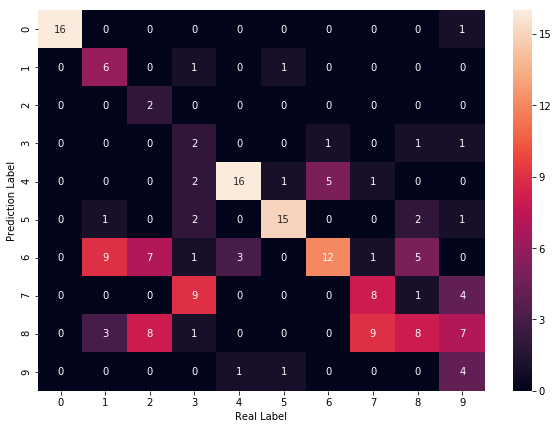

In [20]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [21]:
plt.hist(list_P)

(array([17.,  8.,  2.,  5., 25., 21., 38., 22., 36.,  6.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [22]:
plt.hist(digits.target[1617:])

(array([16., 19., 17., 18., 20., 18., 18., 19., 17., 18.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [23]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))


#0 min_error:2 index:[5] real:5
#1 min_error:4 index:[3 6] real:2
#2 min_error:2 index:[3] real:8
#3 min_error:2 index:[0] real:0
#4 min_error:3 index:[1] real:1
#5 min_error:4 index:[7 8] real:7
#6 min_error:3 index:[3] real:6
#7 min_error:3 index:[7] real:3
#8 min_error:4 index:[2 8] real:2
#9 min_error:1 index:[1] real:1
#10 min_error:3 index:[6] real:7
#11 min_error:5 index:[5 6 9] real:4
#12 min_error:4 index:[4] real:6
#13 min_error:3 index:[3] real:3
#14 min_error:1 index:[1] real:1
#15 min_error:4 index:[5 6] real:3
#16 min_error:4 index:[7] real:9
#17 min_error:2 index:[1] real:1
#18 min_error:4 index:[7 8] real:7
#19 min_error:3 index:[6] real:6
#20 min_error:3 index:[8] real:8
#21 min_error:3 index:[4] real:4
#22 min_error:4 index:[3] real:3
#23 min_error:1 index:[1] real:1
#24 min_error:1 index:[4] real:4
#25 min_error:3 index:[0] real:0
#26 min_error:1 index:[5] real:5
#27 min_error:2 index:[8] real:3
#28 min_error:4 index:[5 6] real:6
#29 min_error:2 index:[7] real:9
#30 

### part 2. add more classifier

real1 ->4

In [24]:
winner_list_append = []
classes = [[1,3,8,9],[0,1,3,5,7],[0,1,5,6,7],[0,4,7,9],[1,2,6,7,8]]

for class1 in classes:
    winner = get_winner(class1)
    winner_list_append.append(winner)

number of class1:647
number of class2:970

 ****** Running generation 0 ****** 

Population's average fitness: 0.09162 stdev: 0.18070
Best fitness: 0.40939 - size: (2, 13) - species 2 - id 196
Average adjusted fitness: 0.434
Mean genetic distance 2.930, standard deviation 0.503
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 6.049 sec

 ****** Running generation 1 ****** 

Population's average fitness: -0.92069 stdev: 3.66996
Best fitness: 0.43151 - size: (3, 13) - species 7 - id 204
Average adjusted fitness: 0.936
Mean genetic distance 3.042, standard deviation 0.486
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 6.953 sec (6.501 average)

 ****** Running generation 2 ****** 

Population's average fitness: -1.05643 stdev: 4.43290
Best fitness: 0.44282 - size: (3, 13) - species 5 - id 518
Average adjusted fitness: 0.939
Mean genetic distance 3.042, standard deviation 0.463
Population of 202 members in 36 species
Total extinct

Population's average fitness: -0.83738 stdev: 4.69738
Best fitness: 0.50794 - size: (6, 21) - species 35 - id 2294
Average adjusted fitness: 0.975
Mean genetic distance 3.159, standard deviation 0.503
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 9.439 sec (7.768 average)

 ****** Running generation 25 ****** 

Population's average fitness: -0.45309 stdev: 3.42283
Best fitness: 0.50794 - size: (6, 21) - species 35 - id 2294
Average adjusted fitness: 0.961
Mean genetic distance 3.179, standard deviation 0.503
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 7.895 sec (7.776 average)

 ****** Running generation 26 ****** 

Population's average fitness: -0.30027 stdev: 2.14486
Best fitness: 0.50794 - size: (6, 21) - species 35 - id 2294
Average adjusted fitness: 0.950
Mean genetic distance 3.163, standard deviation 0.511
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 8.068 sec (7.798 average)

 ***

Population's average fitness: -0.51865 stdev: 3.14074
Best fitness: 0.38358 - size: (3, 15) - species 20 - id 1255
Average adjusted fitness: 0.957
Mean genetic distance 3.082, standard deviation 0.510
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 7.602 sec (6.898 average)

 ****** Running generation 9 ****** 

Population's average fitness: -0.72259 stdev: 4.56027
Best fitness: 0.38358 - size: (3, 15) - species 20 - id 1255
Average adjusted fitness: 0.971
Mean genetic distance 3.061, standard deviation 0.500
Population of 207 members in 34 species
Total extinctions: 0
Generation time: 7.646 sec (6.973 average)

 ****** Running generation 10 ****** 

Population's average fitness: -0.35536 stdev: 2.51079
Best fitness: 0.38358 - size: (3, 15) - species 20 - id 1255
Average adjusted fitness: 0.938
Mean genetic distance 3.083, standard deviation 0.495
Population of 206 members in 35 species
Total extinctions: 0
Generation time: 8.064 sec (6.974 average)

 ****

Mean genetic distance 3.187, standard deviation 0.543
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 9.008 sec (8.730 average)

 ****** Running generation 33 ****** 

Population's average fitness: -0.60333 stdev: 3.00500
Best fitness: 0.41532 - size: (3, 15) - species 3 - id 4623
Average adjusted fitness: 0.948
Mean genetic distance 3.188, standard deviation 0.549
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 8.727 sec (8.679 average)

 ****** Running generation 34 ****** 

Population's average fitness: -0.71643 stdev: 4.31948
Best fitness: 0.41532 - size: (3, 15) - species 3 - id 4623
Average adjusted fitness: 0.979
Mean genetic distance 3.177, standard deviation 0.539
Population of 192 members in 23 species
Total extinctions: 0
Generation time: 9.221 sec (8.638 average)

 ****** Running generation 35 ****** 

Population's average fitness: -0.30484 stdev: 2.12273
Best fitness: 0.41532 - size: (3, 15) - species 3 - id 4623


Mean genetic distance 3.222, standard deviation 0.456
Population of 208 members in 39 species
Total extinctions: 0
Generation time: 7.634 sec (7.820 average)

 ****** Running generation 17 ****** 

Population's average fitness: -0.20908 stdev: 2.68605
Best fitness: 0.40785 - size: (5, 19) - species 19 - id 2349
Average adjusted fitness: 0.980
Mean genetic distance 3.220, standard deviation 0.466
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 7.586 sec (7.881 average)

 ****** Running generation 18 ****** 

Population's average fitness: -0.41246 stdev: 3.00918
Best fitness: 0.40785 - size: (5, 19) - species 19 - id 2349
Average adjusted fitness: 0.974
Mean genetic distance 3.233, standard deviation 0.469
Population of 193 members in 35 species
Total extinctions: 0
Generation time: 7.252 sec (7.859 average)

 ****** Running generation 19 ****** 

Population's average fitness: -0.89034 stdev: 7.73948
Best fitness: 0.40785 - size: (5, 19) - species 19 - id 23

Population's average fitness: -1.03533 stdev: 3.87360
Best fitness: 0.45580 - size: (2, 13) - species 3 - id 314
Average adjusted fitness: 0.931
Mean genetic distance 2.982, standard deviation 0.472
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 5.819 sec (5.660 average)

 ****** Running generation 2 ****** 

Population's average fitness: -1.76363 stdev: 6.14414
Best fitness: 0.50068 - size: (3, 16) - species 1 - id 532
Average adjusted fitness: 0.944
Mean genetic distance 2.947, standard deviation 0.464
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 5.869 sec (5.730 average)

 ****** Running generation 3 ****** 

Population's average fitness: -0.97128 stdev: 3.73289
Best fitness: 0.53055 - size: (4, 18) - species 28 - id 680
Average adjusted fitness: 0.947
Mean genetic distance 2.982, standard deviation 0.479
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 5.884 sec (5.768 average)

 ****** Run

Total extinctions: 0
Generation time: 7.651 sec (7.976 average)

 ****** Running generation 26 ****** 

Population's average fitness: -0.66542 stdev: 3.55358
Best fitness: 0.57538 - size: (9, 27) - species 20 - id 3202
Average adjusted fitness: 0.945
Mean genetic distance 3.217, standard deviation 0.568
Population of 195 members in 22 species
Total extinctions: 0
Generation time: 9.556 sec (8.189 average)

 ****** Running generation 27 ****** 

Population's average fitness: -0.88653 stdev: 6.08303
Best fitness: 0.57538 - size: (9, 27) - species 20 - id 3202
Average adjusted fitness: 0.977
Mean genetic distance 3.230, standard deviation 0.572
Population of 206 members in 22 species
Total extinctions: 0
Generation time: 8.031 sec (8.225 average)

 ****** Running generation 28 ****** 

Population's average fitness: -0.42038 stdev: 2.67256
Best fitness: 0.57538 - size: (9, 27) - species 20 - id 3202
Average adjusted fitness: 0.957
Mean genetic distance 3.235, standard deviation 0.575
Popul

Population's average fitness: -0.37767 stdev: 2.55905
Best fitness: 0.44999 - size: (5, 20) - species 26 - id 1406
Average adjusted fitness: 0.935
Mean genetic distance 3.178, standard deviation 0.484
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 7.024 sec (6.585 average)

 ****** Running generation 11 ****** 

Population's average fitness: -0.63313 stdev: 3.86036
Best fitness: 0.44999 - size: (5, 20) - species 26 - id 1406
Average adjusted fitness: 0.970
Mean genetic distance 3.172, standard deviation 0.482
Population of 207 members in 39 species
Total extinctions: 0
Generation time: 7.315 sec (6.712 average)

 ****** Running generation 12 ****** 

Population's average fitness: -0.94990 stdev: 4.90033
Best fitness: 0.44999 - size: (5, 20) - species 26 - id 1406
Average adjusted fitness: 0.968
Mean genetic distance 3.174, standard deviation 0.479
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 7.720 sec (6.859 average)

 ***

Population's average fitness: -0.71493 stdev: 4.59705
Best fitness: 0.50891 - size: (4, 15) - species 14 - id 4508
Average adjusted fitness: 0.969
Mean genetic distance 3.208, standard deviation 0.511
Population of 191 members in 30 species
Total extinctions: 0
Generation time: 8.508 sec (8.590 average)

 ****** Running generation 35 ****** 

Population's average fitness: -0.55931 stdev: 3.14977
Best fitness: 0.50891 - size: (4, 15) - species 14 - id 4508
Average adjusted fitness: 0.943
Mean genetic distance 3.209, standard deviation 0.505
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 8.464 sec (8.631 average)

 ****** Running generation 36 ****** 

Population's average fitness: -0.59267 stdev: 3.05318
Best fitness: 0.50891 - size: (4, 15) - species 14 - id 4508
Average adjusted fitness: 0.943
Mean genetic distance 3.222, standard deviation 0.515
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 8.200 sec (8.632 average)

 ***

In [25]:
appended_winner_list = winner_list + winner_list_append

In [26]:
appended_number_codes = [[1,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,1,1,1,0],
[0,0,1,1,1,1,0,1,0,1,1,0,0,1,0,1,1,1,0,1],
[1,0,0,1,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1],
[0,0,1,1,0,1,1,1,0,0,0,0,1,0,1,1,1,0,0,0],
[1,1,1,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0],
[0,1,0,0,1,1,0,1,1,1,0,0,0,0,1,0,1,1,0,0],
[1,0,1,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1],
[0,0,0,1,1,1,1,0,1,0,1,1,0,0,1,0,1,1,1,1],
[1,1,0,1,0,1,1,0,0,1,0,0,0,1,1,1,0,0,0,1],
[0,1,1,1,0,0,0,0,1,0,1,0,0,1,1,1,0,0,1,0]]

In [27]:
classes = [[0,2,4,6,8],[0,4,5,8,9],[1,3,4,6,9],[1,2,3,6,7,8,9],[1,4,5,6,7],[1,3,5,7,8],[0,3,4,7,8],[1,2,3,4,5],[0,2,5,7,9],[1,2,5,6,8],[1,2,4,7,9],[0,6,7],[0,2,3],[1,8,9],[0,2,3,4,5,6,7,8,9]] + classes



In [28]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(appended_winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [29]:
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(20):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(20 - np.sum(appended_number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

In [30]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:3 index:[5] real:5
#1 min_error:6 index:[3 6] real:2
#2 min_error:3 index:[3] real:8
#3 min_error:3 index:[0] real:0
#4 min_error:5 index:[6] real:1
#5 min_error:6 index:[7] real:7
#6 min_error:6 index:[2 3 6] real:6
#7 min_error:6 index:[3] real:3
#8 min_error:5 index:[2] real:2
#9 min_error:4 index:[1] real:1
#10 min_error:6 index:[6] real:7
#11 min_error:7 index:[5 6] real:4
#12 min_error:5 index:[6] real:6
#13 min_error:5 index:[3] real:3
#14 min_error:4 index:[1] real:1
#15 min_error:6 index:[5] real:3
#16 min_error:7 index:[1 7 8] real:9
#17 min_error:4 index:[1] real:1
#18 min_error:5 index:[7] real:7
#19 min_error:3 index:[6] real:6
#20 min_error:5 index:[8] real:8
#21 min_error:3 index:[4] real:4
#22 min_error:5 index:[3] real:3
#23 min_error:3 index:[1] real:1
#24 min_error:1 index:[4] real:4
#25 min_error:4 index:[4] real:0
#26 min_error:2 index:[5] real:5
#27 min_error:4 index:[8] real:3
#28 min_error:5 index:[6] real:6
#29 min_error:6 index:[7] real:9
#30 min_

In [31]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
        
np.sum(list_P == digits.target[1617:])/180

0.6222222222222222

In [32]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[15  0  0  0  0  0  0  0  0  0]
 [ 0  5  0  0  0  1  0  0  0  0]
 [ 0  3  6  1  0  0  0  0  0  0]
 [ 0  1  0  8  0  0  1  1  2  1]
 [ 1  1  0  2 16  2  1  0  0  0]
 [ 0  1  1  1  0 14  1  0  4  1]
 [ 0  5  3  0  3  0 15  1  3  0]
 [ 0  0  0  5  0  0  0 17  2  3]
 [ 0  3  7  1  1  0  0  0  6  3]
 [ 0  0  0  0  0  1  0  0  0 10]]


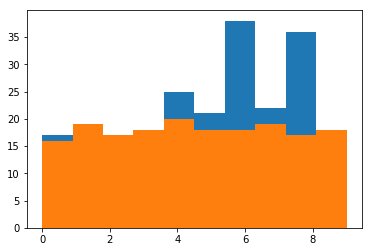

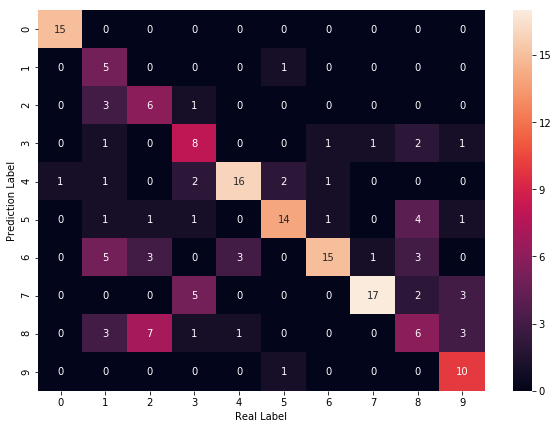

In [33]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [34]:
## 加一个confusion matrix 将容易出错的两个数字增加分类！！！！比如 8 和6 容易分错，设计一个code 将8 和6 分成两类

In [35]:
## 分别绘制15个分类器的准确率随着训练的变化，有可能ecoc 的还比他们都高哈哈哈